survival - 0 = No, 1 = Yes
pclass	- 1 = 1st, 2 = 2nd, 3 = 3rd
sex
Age	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket
fare	price	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Arquivos/train.csv')
test = pd.read_csv('Arquivos/test.csv')

Transform sex to binary

In [3]:
def gender_passengers(value):
    if value == 'female':
        return 1
    else:
        return 0
    
train['Sex_Binary'] = train['Sex'].map(gender_passengers)
test['Sex_Binary'] = test['Sex'].map(gender_passengers)

## First Model - Gender and Age (RandomForestClassifier)

In [45]:
variaveis = ['Sex_Binary', 'Age']
X_train = train[variaveis]
X_train = X_train.fillna(-1)

y_train = train['Survived']

X_test = test[variaveis]
X_test = X_test.fillna(-1)

O modelo solicita o numero de arvores, que é interessante ser no minimo 100.

In [23]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_train, y_train)

y_previsto = modelo.predict(X_test)
y_previsto

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
sub = pd.Series(y_previsto, index=test['PassengerId'], name='Survived')
sub.to_csv('Arquivos/first_test.csv')

### Second Model - Gender and Age (train_test_split)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

variaveis = ['Sex_Binary', 'Age']
X = train[variaveis]
X = X.fillna(-1)

y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [24]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_train, y_train)

y_previsto = modelo.predict(X_test)

Fazendo a acurácia que é a media dos acertos, y_test é o original e y_previsto é o que previ

In [25]:
np.mean(y_test == y_previsto)

0.7690582959641256

Fazendo o teste caso todas as mulheres sobrevivam

In [26]:
y_previsto = (X_test['Sex_Binary']==1).astype(np.int64)
np.mean(y_test == y_previsto)

0.7825112107623319

## Validação Cruzada
Entendendo que a definição de um seed pode interferir na acuracia do modelo, pois basta alterar a seed que o modelo muda, é necessário tratar essa aleatoriedade.

In [28]:
from sklearn.model_selection import KFold

resultados = []
for rep in range(10):
    print("Rep:", rep)
    kf = KFold(3, shuffle=True, random_state=rep)
    
    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_train, y_train)

        y_previsto = modelo.predict(X_test)

        acc = np.mean(y_test == y_previsto)
        resultados.append(acc)
        print("Acc:", acc)
        print()


Rep: 0
Treino: 594
Valid: 297
Acc: 0.7609427609427609

Treino: 594
Valid: 297
Acc: 0.7845117845117845

Treino: 594
Valid: 297
Acc: 0.7643097643097643

Rep: 1
Treino: 594
Valid: 297
Acc: 0.7575757575757576

Treino: 594
Valid: 297
Acc: 0.7710437710437711

Treino: 594
Valid: 297
Acc: 0.7878787878787878

Rep: 2
Treino: 594
Valid: 297
Acc: 0.7474747474747475

Treino: 594
Valid: 297
Acc: 0.7878787878787878

Treino: 594
Valid: 297
Acc: 0.7777777777777778

Rep: 3
Treino: 594
Valid: 297
Acc: 0.7441077441077442

Treino: 594
Valid: 297
Acc: 0.7508417508417509

Treino: 594
Valid: 297
Acc: 0.7777777777777778

Rep: 4
Treino: 594
Valid: 297
Acc: 0.7710437710437711

Treino: 594
Valid: 297
Acc: 0.7508417508417509

Treino: 594
Valid: 297
Acc: 0.7373737373737373

Rep: 5
Treino: 594
Valid: 297
Acc: 0.7508417508417509

Treino: 594
Valid: 297
Acc: 0.8215488215488216

Treino: 594
Valid: 297
Acc: 0.7003367003367004

Rep: 6
Treino: 594
Valid: 297
Acc: 0.7508417508417509

Treino: 594
Valid: 297
Acc: 0.777777777

In [31]:
np.mean(resultados)

0.7643097643097645

#### RepeatedKFold

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
    
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_train, y_train)

    y_previsto = modelo.predict(X_test)

    acc = np.mean(y_test == y_previsto)
    resultados.append(acc)
    print("Acc:", acc)
    print()


Treino: 445
Valid: 446
Acc: 0.7511210762331838

Treino: 446
Valid: 445
Acc: 0.7617977528089888

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7399103139013453

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7556053811659192

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7640449438202247


In [36]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

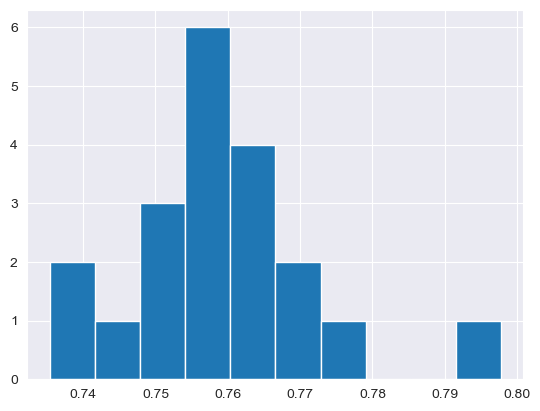

In [37]:
pylab.hist(resultados)

In [39]:
np.mean(resultados)

0.759601451100922

### Third Model - Others variables (RepeatedKFold)

In [46]:
variaveis = ['Sex_Binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
    
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_train, y_train)

    y_previsto = modelo.predict(X_test)

    acc = np.mean(y_test == y_previsto)
    resultados.append(acc)
    print("Acc:", acc)
    print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

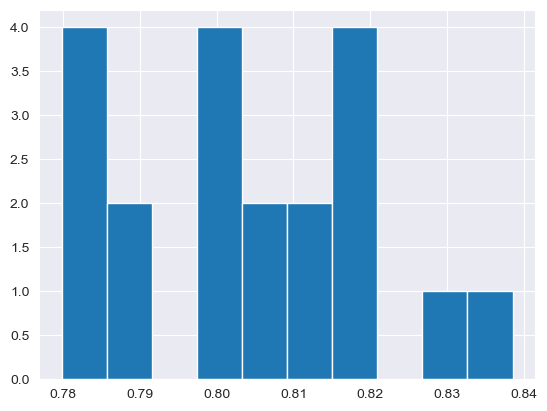

In [43]:
pylab.hist(resultados)

In [44]:
np.mean(resultados)

0.8041457147175896

In [48]:
variaveis = ['Sex_Binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

y_previsto = modelo.predict(test[variaveis].fillna(-1))

In [53]:
test.shape

(418, 12)

In [54]:
sub = pd.Series(y_previsto, index=test['PassengerId'], name='Survived')
sub.to_csv('Arquivos/third_test.csv')

### Fourth Model - Variables text(RepeatedKFold)

#### Analise de erro

In [56]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_train, linhas_test in kf.split(X):
    print("Treino:", linhas_train.shape[0])
    print("Valid:", linhas_test.shape[0])

    X_train, X_test = X.iloc[linhas_train], X.iloc[linhas_test]
    y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_train, y_train)

    y_previsto = modelo.predict(X_test)

    acc = np.mean(y_test == y_previsto)
    resultados.append(acc)
    print("Acc:", acc)
    print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797


In [58]:
X_test_check = train.iloc[linhas_test].copy()
X_test_check['y_previsto'] = y_previsto
X_test_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Binary,y_previsto
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [62]:
erros = X_test_check[X_test_check['Survived'] != X_test_check['y_previsto']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_Binary', 'y_previsto', 'Survived']]
erros

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Binary,y_previsto,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S,1,1,0
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1,0,1
866,867,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0


In [63]:
woman = erros[erros['Sex'] == 'female']
man = erros[erros['Sex'] == 'male']

Incluindo demais variaveis

In [65]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [66]:
variaveis = ['Sex_Binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [100]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_train, linhas_test in kf.split(X):
    print("Treino:", linhas_train.shape[0])
    print("Valid:", linhas_test.shape[0])

    X_train, X_test= X.iloc[linhas_train], X.iloc[linhas_test]
    y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]
    
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    
    modelo.fit(X_train, y_train)

    y_previsto = modelo.predict(X_test)

    acc = np.mean(y_test == y_previsto)
    resultados2.append(acc)
    print("Acc:", acc)
    print()

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7910112359550562

Treino: 445
Valid: 446
Acc: 0.8228699551569507

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8071748878923767

Treino: 446
Valid: 445
Acc: 0.7910112359550562

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8112359550561797

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8228699551569507

Treino: 446
Valid: 445
Acc: 0.8112359550561797

Treino: 445
Valid: 446
Acc: 0.7825112107623319

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8071748878923767

Treino: 446
Valid: 445
Acc: 0.8089887640449438


((array([1., 0., 1., 2., 0., 4., 5., 3., 1., 3.]),
  array([0.7690583 , 0.77488789, 0.78071749, 0.78654709, 0.79237668,
         0.79820628, 0.80403587, 0.80986547, 0.81569507, 0.82152466,
         0.82735426]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

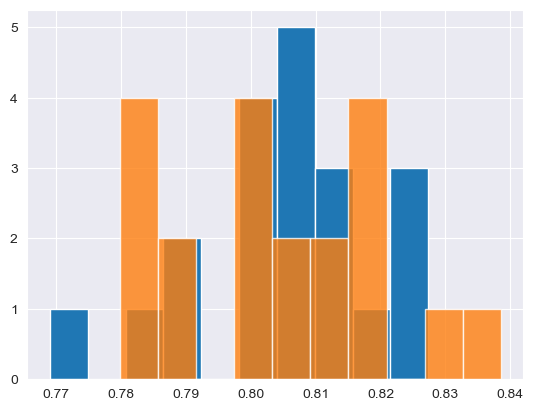

In [82]:
pylab.hist(resultados2), pylab.hist(resultados,alpha=0.8)

In [83]:
np.mean(resultados2)

0.8050486219579784

In [84]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

y_previsto = modelo.predict(test[variaveis].fillna(-1))

In [85]:
sub = pd.Series(y_previsto, index=test['PassengerId'], name='Survived')
sub.to_csv("Arquivos/fourth_test.csv", header=True)

(418,)

### Fifth Model - Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
resultados3 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_train, linhas_test in kf.split(X):
    print("Treino:", linhas_train.shape[0])
    print("Valid:", linhas_test.shape[0])

    X_train, X_test= X.iloc[linhas_train], X.iloc[linhas_test]
    y_train, y_test = y.iloc[linhas_train], y.iloc[linhas_test]

    modelo = LogisticRegression()
    
    modelo.fit(X_train, y_train)

    y_previsto = modelo.predict(X_test)

    acc = np.mean(y_test == y_previsto)
    resultados3.append(acc)
    print("Acc:", acc)
    print()

Treino: 445
Valid: 446
Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8094170403587444

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446


C:\Users\loany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\loany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8228699551569507

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8408071748878924

Treino: 446
Valid: 445


C:\Users\loany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\loany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8094170403587444

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8340807174887892

Treino: 446
Valid: 445
Acc: 0.8269662921348314


C:\Users\loany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


((array([3., 1., 3., 3., 3., 2., 1., 1., 1., 2.]),
  array([0.8       , 0.80408072, 0.80816143, 0.81224215, 0.81632287,
         0.82040359, 0.8244843 , 0.82856502, 0.83264574, 0.83672646,
         0.84080717]),
  <BarContainer object of 10 artists>),
 (array([1., 0., 1., 2., 0., 4., 5., 3., 1., 3.]),
  array([0.7690583 , 0.77488789, 0.78071749, 0.78654709, 0.79237668,
         0.79820628, 0.80403587, 0.80986547, 0.81569507, 0.82152466,
         0.82735426]),
  <BarContainer object of 10 artists>))

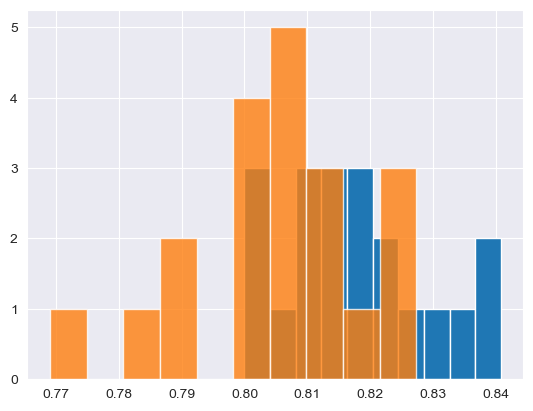

In [93]:
pylab.hist(resultados3), pylab.hist(resultados2,alpha=0.8)

In [94]:
np.mean(resultados3)

0.8178379603970374

In [95]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = LogisticRegression()
modelo.fit(X, y)

y_previsto = modelo.predict(test[variaveis].fillna(-1))

C:\Users\loany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
sub = pd.Series(y_previsto, index=test['PassengerId'], name='Survived')
sub.to_csv("Arquivos/fifth_test.csv", header=True)